In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/project_2

/content/drive/MyDrive/project_2


In [4]:
!ls

 app.py				      mlruns
 jewelry_price_prediction	     'Random Forest_feature_importance.png'
'Linear Regression_params_plot.png'   RandomForest_feature_importance.png
 mlartifacts			      random_forest_model.pkl
 mlflow.log			     'Random Forest_params_plot.png'


In [5]:
# Import required utilities
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [6]:
data = pd.read_csv('/content/drive/My Drive/project_2/jewelry_price_prediction/Jewelry_Dataset.csv')

data.columns = [
    "Order_datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",
]

data2 = data.copy()

In [7]:
data.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 11:40:29 UTC,1.924720e+18,1.842200e+18,1,1.806830e+18,jewelry.earring,0.0,561.51,1.515920e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1.924900e+18,1.806830e+18,1,1.806830e+18,NaN,NaN,212.14,1.515920e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1.925510e+18,1.842210e+18,1,1.806830e+18,jewelry.pendant,1.0,54.66,1.515920e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1.925630e+18,1.835570e+18,1,1.806830e+18,jewelry.pendant,0.0,88.90,1.515920e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1.925740e+18,1.873940e+18,1,1.806830e+18,jewelry.necklace,0.0,417.67,1.515920e+18,NaN,red,gold,amethyst


In [8]:
## Cardinality

In [9]:
# Feature cardinality
data.nunique()

,0
Order_datetime,74505
Order_ID,32910
Product_ID,1706
SKU_Quantity,1
Category_ID,2
Category,218
Brand_ID,37
Price_USD,3166
User_ID,396
Target_Gender,2


In [10]:
# Feature cardinality
data.nunique()

,0
Order_datetime,74505
Order_ID,32910
Product_ID,1706
SKU_Quantity,1
Category_ID,2
Category,218
Brand_ID,37
Price_USD,3166
User_ID,396
Target_Gender,2


In [11]:
#### Data summary

In [12]:
# Describe data
data.describe(include="all")

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
count,95911,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,85978,9.112600e+04,90559.000000,9.055900e+04,47743,88251,90449,61853
unique,74505,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,2,5,3,30
top,2020-10-17 12:58:28 UTC,NaN,NaN,NaN,NaN,jewelry.earring,NaN,NaN,NaN,f,red,gold,diamond
freq,26,NaN,NaN,NaN,NaN,29052,NaN,NaN,NaN,47379,69511,89082,29610
mean,NaN,2.485185e+18,1.815969e+18,1.0,1.805948e+18,NaN,8.890964e+16,362.215217,1.512648e+18,NaN,NaN,NaN,NaN
std,NaN,1.934825e+17,2.136777e+17,0.0,2.083936e+16,NaN,3.559643e+17,444.155706,2.374813e+16,NaN,NaN,NaN,NaN
min,NaN,1.924720e+18,1.313550e+18,1.0,1.313680e+18,NaN,0.000000e+00,0.990000,1.313550e+18,NaN,NaN,NaN,NaN
25%,NaN,2.379725e+18,1.515970e+18,1.0,1.806830e+18,NaN,0.000000e+00,145.620000,1.515920e+18,NaN,NaN,NaN,NaN
50%,NaN,2.524280e+18,1.956660e+18,1.0,1.806830e+18,NaN,1.000000e+00,258.770000,1.515920e+18,NaN,NaN,NaN,NaN
75%,NaN,2.644350e+18,1.956660e+18,1.0,1.806830e+18,NaN,1.000000e+00,431.370000,1.515920e+18,NaN,NaN,NaN,NaN


In [13]:
##### Missing Values

In [14]:
# Check for missing values
100 * data.isnull().sum() / len(data)

,0
Order_datetime,0.000000
Order_ID,0.000000
Product_ID,0.000000
SKU_Quantity,0.000000
Category_ID,5.580173
Category,10.356476
Brand_ID,4.989000
Price_USD,5.580173
User_ID,5.580173
Target_Gender,50.221560


In [15]:
print(data.shape)

(95911, 13)


In [16]:
##### Low cardinality

In [17]:
# Number of unique values per feature
data.nunique()

,0
Order_datetime,74505
Order_ID,32910
Product_ID,1706
SKU_Quantity,1
Category_ID,2
Category,218
Brand_ID,37
Price_USD,3166
User_ID,396
Target_Gender,2


In [18]:
## Apart from the target variable, which is the jewelry price, all other variables may be considered categorical in nature. Also, the SKU_Quantity feature has just one unique value, giving it a variance of 0. As such, it conferrs no new informative property on the dataset.

In [19]:
##Duplicate records##
#We eliminate duplicated rows.

In [20]:
# Get the duplicated records
num_duplicated = len(data.loc[data.duplicated()])

In [21]:
print(f"Number of duplicated records: {num_duplicated}.")

Number of duplicated records: 2955.


In [22]:
# Filter away the duplicated records
data = data.loc[~data.duplicated()]

In [23]:
### Target Distribution

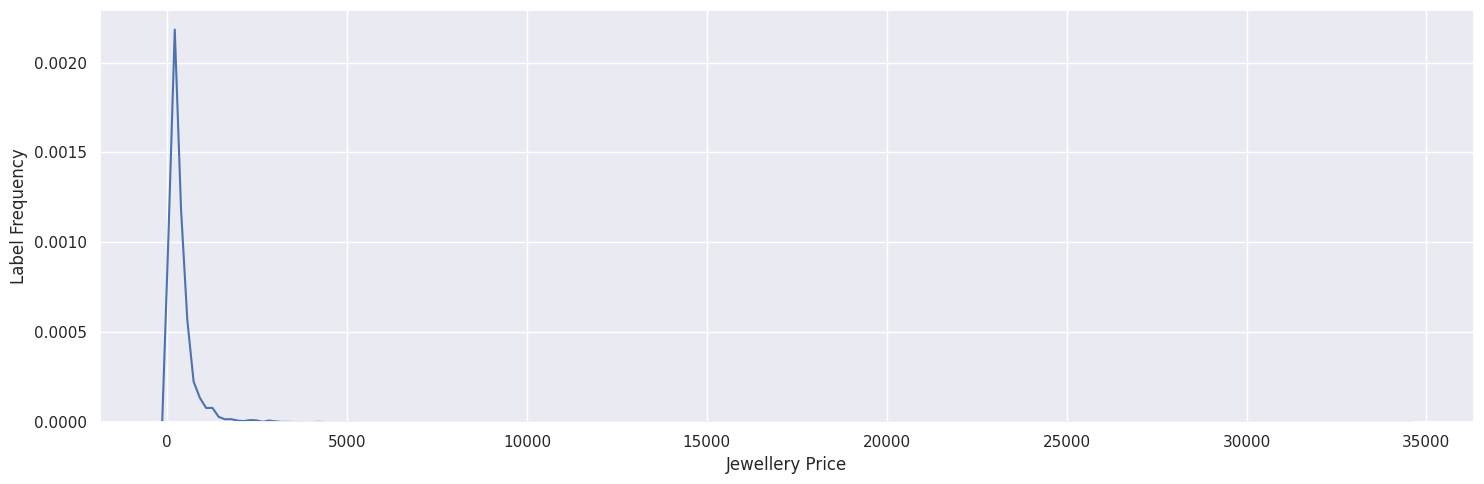

In [24]:
# Bar chart
plt.figure(figsize = (15, 5))
sns.kdeplot(data = data, x = "Price_USD")
plt.xlabel("Jewellery Price")
plt.ylabel("Label Frequency")

plt.tight_layout()
plt.show()

In [25]:
## The jewelry prices, which are the target labels, are right-skewed i.e., most outliers exist on the high end. This may imply that most jewelry pieces are sold to more regular, mainstream buyers, while high-value sales are rarely conducted.

In [26]:
## Target Gender Analysis
## According to social norms, females are more likely to be interested in jewelry than their male counterparts [PAPER], and this skew can be very extreme. It can be interesting to see how this might reflect in this dataset.


In [27]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts()

,count
Target_Gender,
f,46656
m,359


In [28]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts(normalize = True) * 100

,proportion
Target_Gender,
f,99.236414
m,0.763586


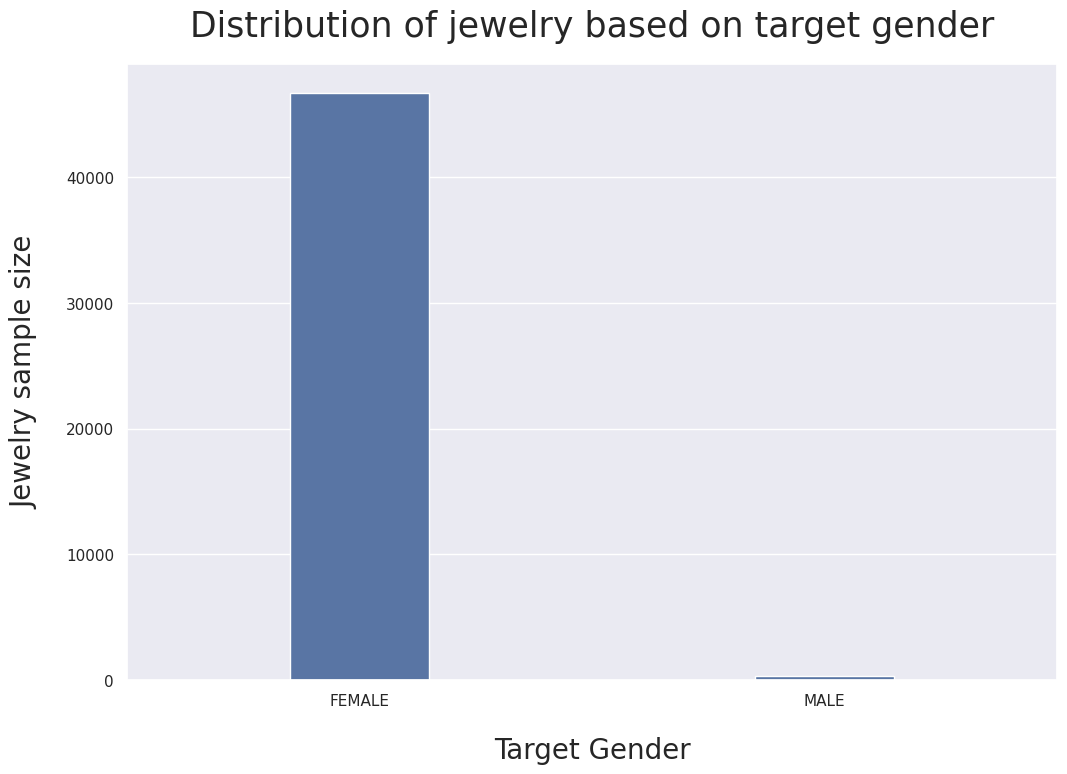

In [29]:
# Visualize jewelry distribution by gender
plt.figure(figsize = (12, 8))

sns.countplot(data=data, x = "Target_Gender", width = 0.3)
plt.title("Distribution of jewelry based on target gender", fontsize=25, pad=20)

plt.xlabel("Target Gender", fontsize=20, labelpad=20)
plt.ylabel("Jewelry sample size", fontsize=20, labelpad=20)

plt.xticks([0, 1], ['FEMALE', 'MALE'])

plt.show(); plt.close("all")

In [30]:
## Based on the short univariate analysis above, we can conclude that a majority of jewelry pieces are specifically targeted toward women. This would probably be a result of market analysis.

# We can thus assume that the __male__ value in the __Target_Gender__ column is a rare one. This leaves us with one of two options:

#1. Retain the column or
#2. Eliminate the column, as it does not give us much diversity within gender.

#Since this state of affairs is an actual representation of the real-world distribution and how the genders interact with jewelry, the final decision we will make here will be to retain the column.

In [31]:
### Jewelry Category Analysis
#It would make some sense to observe the different jewelry categories on sale.

In [32]:
# Jewelry category distribution
data["Category"].value_counts()

,count
Category,
jewelry.earring,29021
jewelry.ring,26012
jewelry.pendant,13062
jewelry.bracelet,6121
0,4020
...,...
626.58,1
13.42,1
2.88,1


In [33]:
# Top 10 categories by sample size
data["Category"].value_counts()[:10]

,count
Category,
jewelry.earring,29021
jewelry.ring,26012
jewelry.pendant,13062
jewelry.bracelet,6121
0,4020
jewelry.necklace,2330
jewelry.brooch,1285
jewelry.souvenir,170
electronics.clocks,165


In [34]:
data["Category"].unique()

array(['jewelry.earring', nan, 'jewelry.pendant', 'jewelry.necklace',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.9', '380.1', '357.49', '15.47', '135.33', '719.75',
       '93.01', '177.95', 'jewelry.stud', '102.1', '595.75', '469.56',
       '427.07', '53.62', '77.53', '1469.18', '355.27', '184.89',
       '154.66', '300.58', '83.73', '271.19', '3294.21', '278.04',
       '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22', '124.88',
       '89.73', '171.23', '136.93', '19.04', '158.77', '187.1', '151.92',
       '1845.89', '87.23', '248.58', '596.48', '208.88', '193.11',
       '169.84', '1447.68', '45.07', '136.85', '282.05', '61.51',
       '210.21', '137.12', '1

In [35]:
#From the short analysis done above, it can be seen that a portion of the data has been corrupted. Rather than containing the accurate jewelry categories, some records contain stringified numerical values instead. This may be due to a number of possible issues such as:

#Corrupted data recording process
#Lack of accurate data dictionary (these numerical values may encode some information about other jewelry categories)
#Also, it was observed that some records did not describe jewelry, they described electronic clocks instead. These records will have to be filtered out. We can also see that the only jewelry item that seems to be targeted towards the men are rings.

In [36]:
#We can extract the actual jewelry categories of interest.

In [37]:
# Exctract real jewelry categories
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and c.__contains__("jewelry")]

In [38]:
categories

['jewelry.earring',
 'jewelry.pendant',
 'jewelry.necklace',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [39]:
# Extract records with the real categories
real_categories = data.loc[data["Category"].isin(categories), :]

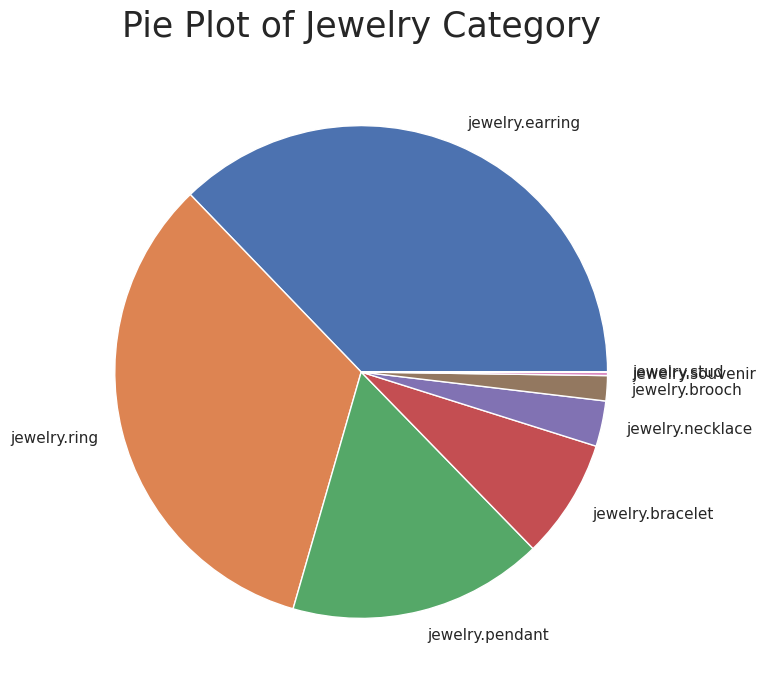

In [40]:
# Visualize the jewelry category via pie chart

jewelry_categories, counts = real_categories["Category"].value_counts().index.tolist(), real_categories["Category"].value_counts().values

plt.figure(figsize = (15, 8))
plt.pie(x=counts, labels=jewelry_categories)

plt.title("Pie Plot of Jewelry Category", fontsize=25, pad=20)

plt.show(); plt.close("all")

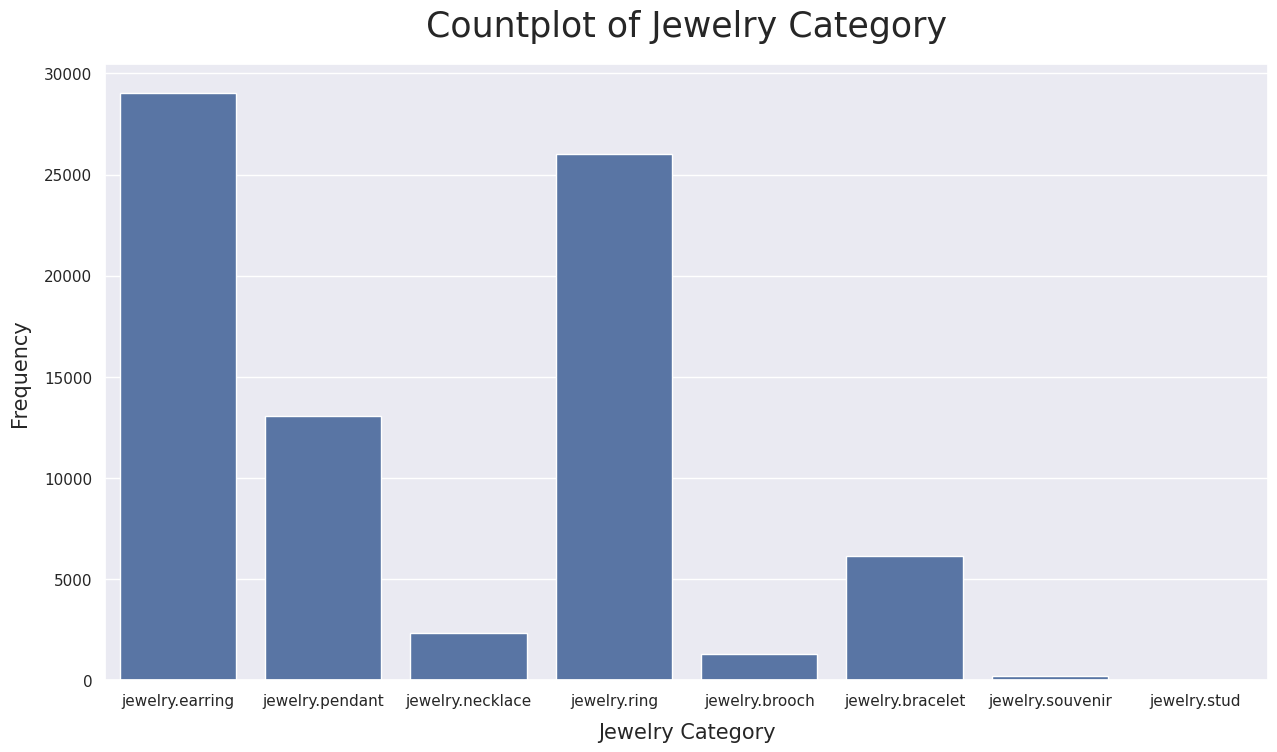

In [41]:
# Visualize the countplot for jewelry category
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category")

plt.title("Countplot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

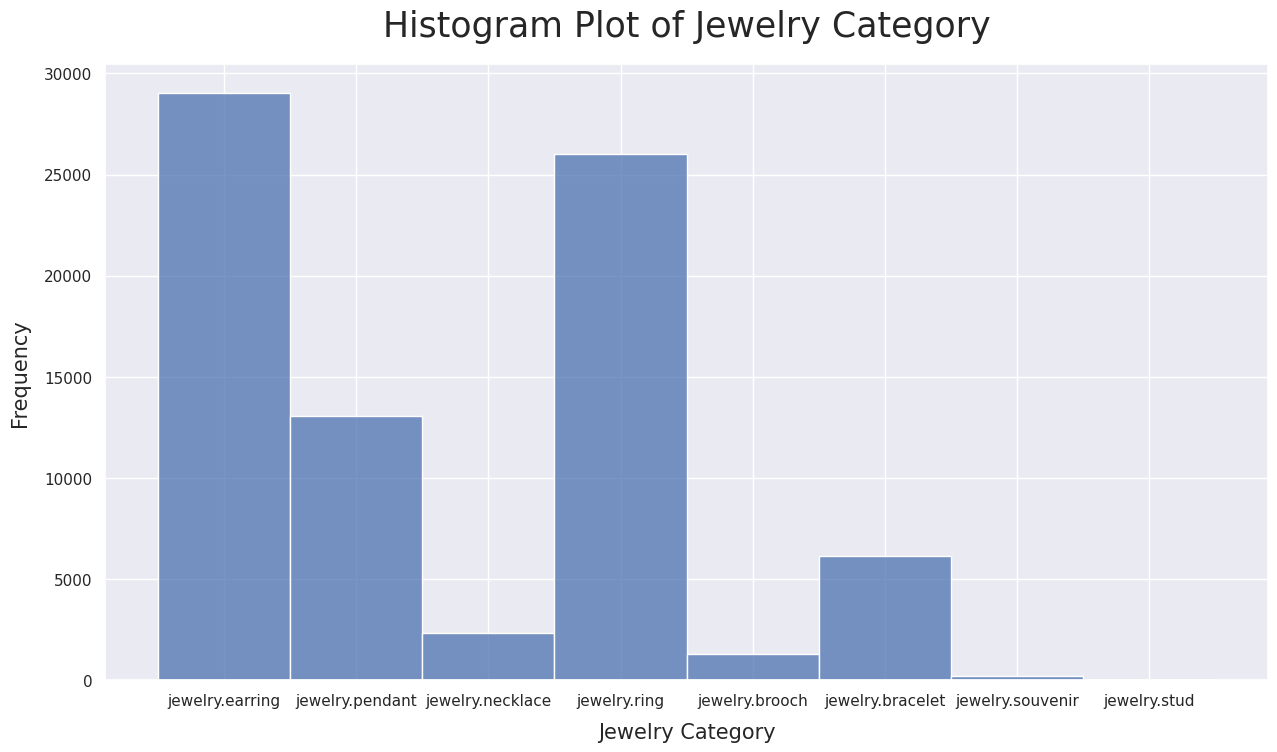

In [42]:
# Visualize the jewelry sample distribution based on jewelry category
plt.figure(figsize = (15, 8))
sns.histplot(data=real_categories, x = "Category")

plt.title("Histogram Plot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

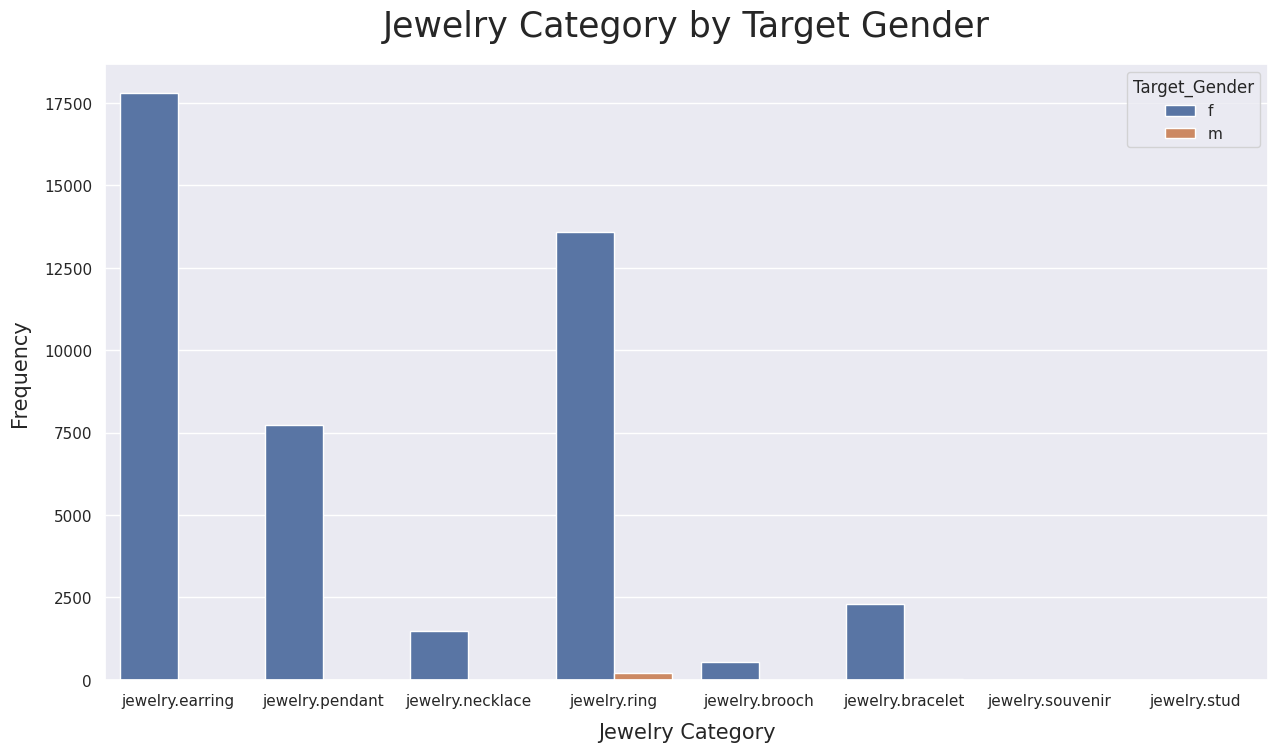

In [43]:
# Jewelry category by gender
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category", hue = "Target_Gender")

plt.title("Jewelry Category by Target Gender", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

In [44]:
# Jewelry target gender distribution
real_categories["Target_Gender"].value_counts(normalize=True) * 100

,proportion
Target_Gender,
f,99.44372
m,0.55628


In [45]:
encoded, category_codes = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [46]:
encoded, category_codes = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [47]:
encoded, category_codes = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

In [48]:
encoded, category_codes = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [49]:
encoded, category_codes = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [50]:
# Obtain Spearman Rank correlation coeficients for all features
correlations = real_categories.drop(["Order_datetime", "User_ID", "Order_ID"], axis=1).corr("spearman")

In [51]:
# Obtain Spearman Rank correlation coeficients for all features
correlations = real_categories.drop(["Order_datetime", "User_ID", "Order_ID"], axis=1).corr("spearman")

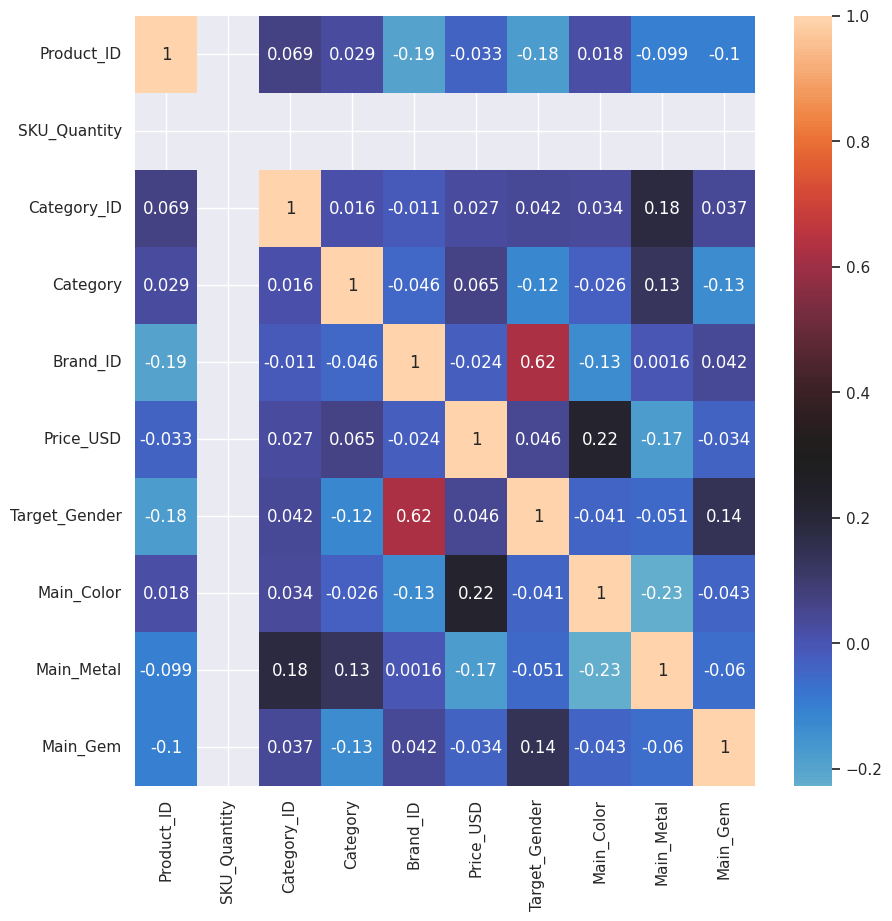

In [52]:
# Correlation heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(correlations, annot=correlations, center=.3)
plt.show()

In [53]:
correlations

,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
Product_ID,1.000000,NaN,0.068503,0.029137,-0.194496,-0.033464,-0.178295,0.018133,-0.098672,-0.100734
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,0.068503,NaN,1.000000,0.015517,-0.011489,0.027374,0.041527,0.033673,0.181230,0.036658
Category,0.029137,NaN,0.015517,1.000000,-0.045596,0.064664,-0.118986,-0.026257,0.130922,-0.133067
Brand_ID,-0.194496,NaN,-0.011489,-0.045596,1.000000,-0.024028,0.622063,-0.131581,0.001619,0.041840
Price_USD,-0.033464,NaN,0.027374,0.064664,-0.024028,1.000000,0.046384,0.224549,-0.174841,-0.033770
Target_Gender,-0.178295,NaN,0.041527,-0.118986,0.622063,0.046384,1.000000,-0.040593,-0.050578,0.140534
Main_Color,0.018133,NaN,0.033673,-0.026257,-0.131581,0.224549,-0.040593,1.000000,-0.226989,-0.042592
Main_Metal,-0.098672,NaN,0.181230,0.130922,0.001619,-0.174841,-0.050578,-0.226989,1.000000,-0.060254
Main_Gem,-0.100734,NaN,0.036658,-0.133067,0.041840,-0.033770,0.140534,-0.042592,-0.060254,1.000000


In [54]:
# Set correlation limits
lower_corr_limits = .2
upper_corr_limits = 1.

In [55]:
correlated_columns = {
    column: correlations[(correlations[column] > lower_corr_limits) & (upper_corr_limits > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [56]:
correlated_columns

{'Product_ID': [],
 'SKU_Quantity': [],
 'Category_ID': [],
 'Category': [],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Main_Color'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': ['Price_USD'],
 'Main_Metal': [],
 'Main_Gem': []}

In [57]:
num_correlated_columns = {k: len(v) for k, v in correlated_columns.items()}

In [58]:
num_correlated_columns

{'Product_ID': 0,
 'SKU_Quantity': 0,
 'Category_ID': 0,
 'Category': 0,
 'Brand_ID': 1,
 'Price_USD': 1,
 'Target_Gender': 1,
 'Main_Color': 1,
 'Main_Metal': 0,
 'Main_Gem': 0}

In [59]:
# Import necessary libraries

from sklearn.model_selection import train_test_split

# Install required package
!pip install scikit-learn==1.3.0

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
# from xgboost import XGBRegressor # Commented out as we're using a different approach
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.base import BaseEstimator, RegressorMixin # Import BaseEstimator and RegressorMixin


In [60]:
# Columns to drop
to_drop = [
    "SKU_Quantity",
    "Order_ID",
    "Product_ID",
    "Order_datetime",
    "User_ID",
    "Category_ID"

]

In [61]:
data.drop(labels = to_drop, axis=1, inplace=True)

In [62]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,jewelry.earring,0.0,561.51,NaN,red,gold,diamond
1,NaN,NaN,212.14,NaN,yellow,gold,NaN
2,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
3,jewelry.pendant,0.0,88.90,f,red,gold,diamond
4,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst


In [63]:
data.nunique()

,0
Category,218
Brand_ID,37
Price_USD,3166
Target_Gender,2
Main_Color,5
Main_Metal,3
Main_Gem,30


In [64]:
data.shape

(92956, 7)

In [65]:
# Extract records with the real categories

del real_categories
data = data.loc[data["Category"].isin(categories), :]

In [66]:
data.nunique()

,0
Category,8
Brand_ID,6
Price_USD,2849
Target_Gender,2
Main_Color,4
Main_Metal,3
Main_Gem,30


In [67]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,jewelry.earring,0.0,561.51,NaN,red,gold,diamond
2,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
3,jewelry.pendant,0.0,88.90,f,red,gold,diamond
4,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
5,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [68]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,jewelry.earring,0.0,561.51,NaN,red,gold,diamond
2,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
3,jewelry.pendant,0.0,88.90,f,red,gold,diamond
4,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
5,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [69]:
# Extract features and labels
X, y = data.drop(labels = ["Price_USD"], axis=1), data['Price_USD']

In [70]:
# Column indexes
columns = X.columns.tolist()
column_indexes = [i for i in range(len(X.columns))]

In [71]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [72]:
### Modelling

In [73]:
# Categorical columns
categorical_columns = ["Category", "Target_Gender", "Main_Color", "Main_Gem", "Main_Metal"]
categorical_columns_index = [columns.index(c) for c in categorical_columns]

In [74]:
categorical_columns_index

[0, 2, 3, 5, 4]

In [75]:
# Custom Wrapper for XGBoost
class XGBoostWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model = XGBRegressor(**kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    # Add __sklearn_tags__ method to the wrapper
    def __sklearn_tags__(self):
        return {'requires_y': True, 'requires_fit': True}  # Or your desired tags

In [76]:
def pipeline(model, fill_missing = True, set_categorical = True, use_label_encoder = False):
    first_encoder = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy = "most_frequent"), column_indexes),
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    second_encoder = ColumnTransformer(
        transformers = [
            ("one_hot", OneHotEncoder(), categorical_columns_index),
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    third_encoder = ColumnTransformer(
        transformers = [
            ("label", OrdinalEncoder(), categorical_columns_index),
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    steps = []

    if fill_missing:
        steps.append(("first_encoder", first_encoder))
    if use_label_encoder:
        steps.append(("third_encoder", third_encoder))
    if set_categorical:
        steps.append(("second_encoder", second_encoder))

    steps.append(("model", model))

    model_pipeline = Pipeline(
        steps = steps
    )

    return model_pipeline

In [77]:
# Categorical columns
categorical_columns = ["Category", "Target_Gender", "Main_Color", "Main_Gem", "Main_Metal"]
categorical_columns_index = [columns.index(c) for c in categorical_columns]

# Linear Regression Pipeline
linear_pipe = pipeline(
    LinearRegression(), fill_missing=True, set_categorical=True, use_label_encoder=False
)

# Random Forest Pipeline
rd_pipe = pipeline(
    RandomForestRegressor(), fill_missing=True, set_categorical=True, use_label_encoder=False
)

# Decision Tree Pipeline
tree_pipe = pipeline(
    DecisionTreeRegressor(), fill_missing=True, set_categorical=True, use_label_encoder=False
)

# XGBoost Pipeline
xgb_pipe = pipeline(
    XGBRegressor(), fill_missing=True, set_categorical=True, use_label_encoder=False
)

#Extra tree
extra_pipe = pipeline(
    ExtraTreesRegressor(criterion="friedman_mse", n_estimators = 1000, bootstrap=True),
    fill_missing=True, set_categorical =True, use_label_encoder = False
)

In [78]:
# Apply Box-Cox transformation to target for each pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

linear_pipe_transformed = TransformedTargetRegressor(
    regressor=linear_pipe, transformer=PowerTransformer(method="box-cox")
)
rd_pipe_transformed = TransformedTargetRegressor(
    regressor=rd_pipe, transformer=PowerTransformer(method="box-cox")
)
tree_pipe_transformed = TransformedTargetRegressor(
    regressor=tree_pipe, transformer=PowerTransformer(method="box-cox")
)
xgb_pipe_transformed = TransformedTargetRegressor(
    regressor=xgb_pipe, transformer=PowerTransformer(method="box-cox")
)
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = "box-cox")
)

In [79]:
linear_pipe.fit(X_train, y_train)

Pipeline(steps=[('first_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('second_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 2, 3, 5, 4])])),
                ('model', LinearRegression())])

In [80]:
rd_pipe.fit(X_train, y_train)

Pipeline(steps=[('first_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('second_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 2, 3, 5, 4])])),
                ('model', RandomForestRegressor())])

In [81]:
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('first_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('second_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 2, 3, 5, 4])])),
                ('model', DecisionTreeRegressor())])

In [82]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('first_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('second_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 2, 3, 5, 4])])),
                ('model',
                 XGBRegressor(base_score=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [83]:
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        5,
                                                                                        4])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [84]:
## Model Evaluation


In [85]:
from sklearn.metrics import r2_score, mean_squared_error

In [86]:
def root_mean_squared_error(y_true, y_pred):
    value = np.sqrt(mean_squared_error(y_true, y_pred))
    return value

In [87]:
def generate_model_score(model, data, metric_name, metric):
    X, y = data
    pred = model.predict(X)
    score = metric(y, pred)
    return score

In [88]:
def print_metrics(metric, train_score, test_score, factor=100, suffix="%"):
    print(f"Train {metric} = {factor * train_score: .3f}{suffix}")
    print(f"Test {metric} = {factor * test_score: .3f}{suffix}")
    print(f"Generalization error = {factor * (train_score - test_score): .3f}{suffix}")

    return

In [89]:
def test_model(model, data, metric_name, metric):
    train, test = data

    if isinstance(metric_name, str):
        train_score = generate_model_score(model, train, metric_name, metric)
        test_score = generate_model_score(model, test, metric_name, metric)

        factor = 1 if metric_name.lower() == "rmse" else 100
        suffix = "" if metric_name.lower() == "rmse" else "%"

        print_metrics(metric_name.lower().capitalize(), train_score, test_score, factor = factor, suffix = suffix)
    else:
        for (name, m) in zip(metric_name, metric):
            train_score = generate_model_score(model, train, name, m)
            test_score = generate_model_score(model, test, name, m)

            factor = 1 if name.lower() == "rmse" else 100
            suffix = "" if name.lower() == "rmse" else "%"

            print_metrics(name.lower().capitalize(), train_score, test_score, factor = factor, suffix = suffix)
            print("="*20 + "\n")

    return

In [90]:
# Metrics
metric_name = ["R2", "RMSE",]
metric = [r2_score, root_mean_squared_error,]

In [91]:
# create data variable
data_=[
    [X_train, y_train],
    [X_test, y_test]
]

In [92]:
# Test Random Forest pipeline
test_model(rd_pipe, data_, metric_name, metric)


Train R2 =  27.605%
Test R2 =  33.729%
Generalization error = -6.123%

Train Rmse =  374.968
Test Rmse =  392.659
Generalization error = -17.692



In [93]:
# Test linear regression pipeline
test_model(linear_pipe, data_, metric_name, metric)

Train R2 =  10.679%
Test R2 =  9.741%
Generalization error =  0.938%

Train Rmse =  416.503
Test Rmse =  458.245
Generalization error = -41.742



In [94]:
# Test Decision Tree pipeline
test_model(tree_pipe, data_, metric_name, metric)


Train R2 =  27.671%
Test R2 =  33.800%
Generalization error = -6.129%

Train Rmse =  374.797
Test Rmse =  392.448
Generalization error = -17.651



In [95]:
# Test XGBoost pipeline
test_model(xgb_pipe, data_, metric_name, metric)

Train R2 =  27.622%
Test R2 =  33.820%
Generalization error = -6.198%

Train Rmse =  374.924
Test Rmse =  392.389
Generalization error = -17.465



In [96]:
# Test ExtraTrees pipeline
test_model(extra_pipe, data_, metric_name, metric)

Train R2 =  21.464%
Test R2 =  24.173%
Generalization error = -2.709%

Train Rmse =  390.548
Test Rmse =  420.014
Generalization error = -29.467



In [97]:
## Hyperparameter

In [98]:
# Install dependencies
!pip install mlflow==2.7.1 xgboost scikit-learn matplotlib pyngrok

In [99]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
from pyngrok import ngrok
import os
import time

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_config.py:345: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [100]:
# chatgpt

In [101]:
!pkill -f ngrok  # Kill existing ngrok process

In [102]:
# Authenticate ngrok with your token (Ensure token is provided)
ngrok_token = "2mr1L9QaWuIaXaixSkUEjCnM6M4_2N3RfbBXd7fF5rLNe1zAn"  # Replace with your actual ngrok token
if ngrok_token:
    os.system(f"ngrok authtoken {ngrok_token}")
else:
    raise ValueError("Ngrok token is missing. Please provide a valid token.")


In [103]:
# Start MLflow Tracking UI locally
mlflow.set_tracking_uri("http://127.0.0.1:5000")


In [104]:
# Start MLflow server in the background
get_ipython().system_raw("mlflow server --host 0.0.0.0 --port 5000 --backend-store-uri file:/content/mlruns &")

In [105]:
# Start ngrok to expose MLflow UI
public_url = ngrok.connect(5000, "http")
print(f"MLflow Tracking UI is live at: {public_url}")

MLflow Tracking UI is live at: NgrokTunnel: "https://b2ee-34-80-134-110.ngrok-free.app" -> "http://localhost:5000"


In [106]:
## All models

In [107]:
def log_hyperparameters(model, model_name):
    if isinstance(model, Pipeline):  # Check if model is a pipeline
        model = model.steps[-1][1]  # Get the final step (the actual model)

    if hasattr(model, "get_params"):  # Ensure the model has parameters
        params = model.get_params()
        print(f"Full parameter set for {model_name}: {params}")  # Debugging to check parameters

        important_params = {}

        # Log different parameters for each model
        if "Random Forest" in model_name:
            important_params = {k: params[k] for k in ["n_estimators", "max_depth"] if k in params}
        elif "XGBoost" in model_name:
            important_params = {k: params[k] for k in ["learning_rate", "n_estimators", "max_depth"] if k in params}
        elif "Extra Trees" in model_name:
            important_params = {k: params[k] for k in ["n_estimators", "max_depth"] if k in params}
        elif "Linear Regression" in model_name:
            important_params = {k: params[k] for k in ["fit_intercept"] if k in params}
        elif "Decision Tree" in model_name:
            important_params = {k: params[k] for k in ["criterion", "max_depth", "min_samples_split"] if k in params}

        # Debugging print to check which parameters are being logged
        print(f"Logging parameters for {model_name}: {important_params}")  # Debugging

        with mlflow.start_run(nested=True):  # Ensure MLflow run is active
            mlflow.log_params(important_params)


In [108]:
# Set or create the experiment
experiment_name = "Jewelry Pricing Prediction"
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = experiment.experiment_id

mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/680188757109982631', creation_time=1739125918784, experiment_id='680188757109982631', last_update_time=1739125918784, lifecycle_stage='active', name='Jewelry Pricing Prediction', tags={}>

In [109]:
# ✅ Start an MLflow run
print("Starting MLflow run...")
with mlflow.start_run(run_name="Jewelry Price Prediction"):
    try:
        models = {
            "Linear Regression": linear_pipe,
            "Random Forest": rd_pipe,
            "Decision Tree": tree_pipe,
            "XGBoost": xgb_pipe,
            "Extra Trees": extra_pipe
        }

        for model_name, model in models.items():
            print(f"Training {model_name}...")

            # Train the model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Log hyperparameters
            log_hyperparameters(model, model_name)

            # Log the model itself
            mlflow.sklearn.log_model(model, model_name.lower().replace(" ", "_") + "_model")

            # Calculate and log metrics
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Debugging prints for metrics
            print(f"Metrics for {model_name}: MSE = {mse}, R2 = {r2}")

            # Log metrics to MLflow
            mlflow.log_metric(f"{model_name}_MSE", mse)
            mlflow.log_metric(f"{model_name}_R2", r2)

    except Exception as e:
        print(f"Error during MLflow logging: {e}")


Starting MLflow run...
Training Linear Regression...
Full parameter set for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Logging parameters for Linear Regression: {'fit_intercept': True}


/usr/local/lib/python3.11/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


Metrics for Linear Regression: MSE = 209988.69524336228, R2 = 0.09741099543908416
Training Random Forest...
Full parameter set for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Logging parameters for Random Forest: {'n_estimators': 100, 'max_depth': None}
Metrics for Random Forest: MSE = 153949.67028538577, R2 = 0.33828209421307
Training Decision Tree...
Full parameter set for Decision Tree: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': '

In [111]:
# Save the trained model
import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)